<a href="https://colab.research.google.com/github/bacchus00/cc5208-project/blob/main/visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration and Imports

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GDxJo5RcPCWppHsD09c9morGemaerETD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19IidkMZ4xpKj8ZtM1oVY08J0gsmGpCPX" -O ingresos-campanas-politicas-clean.csv && rm -rf /tmp/cookies.txt

--2023-07-09 21:24:51--  https://docs.google.com/uc?export=download&confirm=t&id=19IidkMZ4xpKj8ZtM1oVY08J0gsmGpCPX
Resolving docs.google.com (docs.google.com)... 142.251.163.138, 142.251.163.102, 142.251.163.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/86n8mm1v9qfsauhev8c2ur82ihsdtp65/1688937825000/06455364071528604762/*/19IidkMZ4xpKj8ZtM1oVY08J0gsmGpCPX?e=download&uuid=fd71952a-4139-4298-ac5f-3d3e774ead94 [following]
--2023-07-09 21:24:54--  https://doc-04-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/86n8mm1v9qfsauhev8c2ur82ihsdtp65/1688937825000/06455364071528604762/*/19IidkMZ4xpKj8ZtM1oVY08J0gsmGpCPX?e=download&uuid=fd71952a-4139-4298-ac5f-3d3e774ead94
Resolving doc-04-1g-docs.googleusercontent.com (doc-04-1g-docs.googleusercontent.com)... 142.251.16.1

In [ ]:
!pip install fitter
!pip install pyvis
!pip install unidecode

  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=b2ad38f71a1ac27db0a375d7603dad7abffa57a8457bf9851bce01f2c70e33e5
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 17.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import seaborn as sns
from pyvis.network import Network
from unidecode import unidecode

In [ ]:
df = pd.read_csv('ingresos-campanas-politicas-clean.csv')
df.info()

<ipython-input-7-755b0925bc4a>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ingresos-campanas-politicas-clean.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488432 entries, 0 to 488431
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Aportante     419282 non-null  object 
 1   RUTAportante  289728 non-null  object 
 2   Candidato     486498 non-null  object 
 3   RUTCandidato  481383 non-null  float64
 4   Partido       438152 non-null  object 
 5   RUTPartido    343447 non-null  float64
 6   Monto         488424 non-null  float64
 7   Fecha         488432 non-null  object 
 8   Origen        465172 non-null  object 
 9   Eleccion      488428 non-null  object 
 10  AnhoEleccion  488432 non-null  int64  
 11  Region        352735 non-null  object 
 12  TipoIngreso   488432 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 48.4+ MB


In [ ]:
df['Region'].unique()

array([nan, 'Region Metropolitana De Santiago', 'Region De Antofagasta',
       'Region De Coquimbo',
       "Region Del Libertador General Bernardo O'higgins",
       'Region Del Biobio', 'Region De Los Lagos',
       'Region De Magallanes Y De La Antartica Chilena',
       'Region De Los Rios', 'Region De Tarapaca', 'Region De Atacama',
       'Region De Valparaiso', 'Region Del Maule',
       'Region De La Araucania',
       'Region De Aysen Del General Carlos Ibanez Del Campo',
       'Region De Arica Y Parinacota', 'Region De Nuble'], dtype=object)

# Grafo Aportes

In [ ]:
df['RUTAportante'].isin(filter).count()

488432

In [ ]:
pd.set_option('display.max_rows', None)
df[df['RUTAportante'].isin(top100_aportantes)][['Aportante','RUTAportante']].groupby(['RUTAportante','Aportante']).size().reset_index().rename(columns={0:'count'})

,RUTAportante,Aportante,count
0,00f814d26bc1bb4c7b25bed04459bc7c,Formulario 107,3
1,0227d6235eb3f4c65294fa062899c838,Andres Sepulveda Rojas,1
2,0227d6235eb3f4c65294fa062899c838,Banco Del Estado,8
3,0227d6235eb3f4c65294fa062899c838,Banco Del Estado Chile,1
4,0227d6235eb3f4c65294fa062899c838,Banco Del Estado De Chile,58
5,0227d6235eb3f4c65294fa062899c838,Banco Del Estado Dechile,52
6,0227d6235eb3f4c65294fa062899c838,Banco Estado,97
7,0227d6235eb3f4c65294fa062899c838,Banco Estado De Chil,2
8,0227d6235eb3f4c65294fa062899c838,Banco Estado De Chile,12
9,0227d6235eb3f4c65294fa062899c838,Banco Estado S.A.,1


In [ ]:
df2 = df[(df['Origen']=='Tercero') & df['RUTPartido'].notna() & df['RUTAportante'].notna()][['Monto', 'RUTAportante', 'RUTPartido']].dropna().copy()
df2 = df2.astype({'Monto': int, 'RUTAportante': str, 'RUTPartido': str})
df2['RUTAportante'] = df2['RUTAportante'].str.strip()
df2['RUTAportante'] = df2['RUTAportante'].str.replace('\.0','')
df2['RUTPartido'] = df2['RUTPartido'].str.strip()
df2['RUTPartido'] = df2['RUTPartido'].str.replace('\.0','')


filter = list(pd.Series(df['RUTPartido'].unique()).dropna().astype(str).str.replace('\.0',''))+['7938007']

df2 = df2[~df2['RUTAportante'].isin(filter)]

df2 = df2.groupby(['RUTAportante', 'RUTPartido']).sum().reset_index().sort_values(by='Monto', ascending=False)

top100_aportantes = df2.groupby(['RUTAportante']).sum().reset_index().sort_values(by='Monto', ascending=False).head(100)['RUTAportante']


df2 = df2[df2['RUTAportante'].isin(top10_aportantes)]
df2.info()

<ipython-input-33-b3a5d0bba98d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['RUTAportante'] = df2['RUTAportante'].str.replace('\.0','')
<ipython-input-33-b3a5d0bba98d>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['RUTPartido'] = df2['RUTPartido'].str.replace('\.0','')
<ipython-input-33-b3a5d0bba98d>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  filter = list(pd.Series(df['RUTPartido'].unique()).dropna().astype(str).str.replace('\.0',''))+['7938007']
<ipython-input-33-b3a5d0bba98d>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top100_aportantes = df2.groupby(['RUTAportante']).sum().reset_index().sort_values(by='Monto', ascendin

NameError: ignored

In [ ]:
top100_aportantes

# Visualización por región

In [ ]:
!pip install pyshp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from shapely.geometry import Polygon, MultiPolygon

In [ ]:
def remove_polygons_to_left(multipolygon, point):
    x, y = point
    polygons_to_keep = []

    for polygon in multipolygon.geoms:
        all_points_to_right = True

        for p in polygon.exterior.coords:
            if p[0] < x:
                all_points_to_right = False
                break

        if all_points_to_right:
            polygons_to_keep.append(polygon)

    return MultiPolygon(polygons_to_keep)


In [ ]:
#shp_path = '/content/drive/MyDrive/Bushe/Visualiza/Proyecto Visualiza/Regiones/Regional.shp'
shp_path = '/content/drive/MyDrive/Proyecto Visualiza/Regiones/Regional.shp' #Para correrlo desde mi pc
gdf = gpd.read_file(shp_path)
gdf.at[7, 'geometry'] = remove_polygons_to_left(gdf.at[7, 'geometry'], (-8764000,0))

In [ ]:
from google.colab import drive #para correrlo desde mi pc
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gdf.Region = gdf.Region.replace(
    ['Región Metropolitana de Santiago',
    'Región de Antofagasta',
    'Región de Arica y Parinacota',
    'Región de Atacama',
    'Región de Aysén del Gral.Ibañez del Campo',
    'Región de Coquimbo',
    'Región de La Araucanía',
    'Región de Los Lagos',
    'Región de Los Ríos',
    'Región de Magallanes y Antártica Chilena',
    'Región de Tarapacá',
    'Región de Valparaíso',
    'Región de Ñuble',
    'Región del Bío-Bío',
    "Región del Libertador Bernardo O'Higgins",
    'Región del Maule'],

    ['Region Metropolitana De Santiago',
    'Region De Antofagasta',
    'Region De Arica Y Parinacota',
    'Region De Atacama',
    'Region De Aysen Del General Carlos Ibanez Del Campo',
    'Region De Coquimbo',
    'Region De La Araucania',
    'Region De Los Lagos',
    'Region De Los Rios',
    'Region De Magallanes Y De La Antartica Chilena',
    'Region De Tarapaca',
    'Region De Valparaiso',
    'Region De Nuble',
    'Region Del Biobio',
    "Region Del Libertador General Bernardo O'higgins",
    'Region Del Maule']
)

In [ ]:
df_geo = df[['Monto', 'Region']].copy().dropna()
df_geo = df_geo.groupby('Region').sum('Monto').reset_index()
df_geo = df_geo.sort_values(by='Region')#.merge(gdf, how='inner', on='Region')
df_geo

,Region,Monto
0,Region De Antofagasta,4.885416e+09
1,Region De Arica Y Parinacota,2.449845e+09
2,Region De Atacama,3.760209e+09
3,Region De Aysen Del General Carlos Ibanez Del ...,1.963020e+09
4,Region De Coquimbo,7.236987e+09
5,Region De La Araucania,1.101280e+10
6,Region De Los Lagos,9.632969e+09
7,Region De Los Rios,5.008553e+09
8,Region De Magallanes Y De La Antartica Chilena,2.669694e+09
9,Region De Nuble,3.068571e+09


    objectid  cir_sena  codregion        area_km    st_area_sh    st_length_  \
0       1084         1         15   16866.819844  1.886869e+10  7.505296e+05   
1       1085         2          1   42284.567484  4.830637e+10  1.213713e+06   
2       1086         3          2  126071.431981  1.508452e+11  2.516112e+06   
3       1087        15         12  133053.142345  3.581316e+11  9.049830e+07   
4       1088        14         11  106703.377369  2.242743e+11  4.144481e+07   
5       1089         4          3   75661.248635  9.643906e+10  2.401741e+06   
6       1090         5          4   40575.901682  5.498082e+10  2.065933e+06   
7       1091         6          5   16322.970393  2.301475e+10  1.679609e+06   
8       1092         7         13   15392.030737  2.225204e+10  1.064253e+06   
9       1093        13         10   48408.371357  8.771834e+10  7.874158e+06   
10      1094        12         14   18245.080563  3.108661e+10  1.844423e+06   
11      1095        11          9   3183

<ipython-input-119-27708ddd4341>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


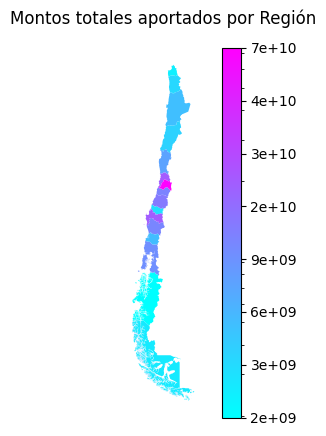

In [ ]:
print(gdf.head(16))
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# color map
cmap = 'cool'

# Define el rango de valores para el colormap
vmin = df_geo['Monto'].min()
vmax = df_geo['Monto'].max()

# Crea la instancia de la normalización del colormap en escala logarítmica
norm = colors.LogNorm(vmin=vmin, vmax=vmax)

# Define el tamaño de la figura en pulgadas (ancho x altura)
fig, ax = plt.subplots()

# Grafica los datos
gdf.head(16).sort_values(by='Region').reset_index().plot(df_geo['Monto'], legend=False, norm=norm, cmap=cmap, ax=ax)


# Agrega una leyenda personalizada
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Configura un arreglo vacío para la leyenda
cbar = plt.colorbar(sm)


# Calcula los valores correspondientes a los ticks en escala logarítmica
vmin = df_geo['Monto'].min()
vmax = df_geo['Monto'].max()
ticks = np.logspace(np.log10(vmin), np.log10(vmax), num=8)  # Ajusta num al número de ticks deseados



# Actualiza los ticks en la leyenda
cbar.set_ticks(ticks)


cbar.set_ticklabels([f"{int(tick):.0e}" for tick in ticks])

# Hacer desaparecer los ejes
ax.axis('off')

# Agrega un título al gráfico
ax.set_title("Montos totales aportados por Región")


# Muestra el gráfico
plt.show()








# crear gráfico
#gdf.head(16).sort_values(by = 'Region').reset_index().plot(df_geo['Monto'], legend=True, norm=norm, cmap=cmap)

# Muestra el gráfico
#plt.show()
#gdf.head(16).sort_values('Region').plot(df_geo['Monto'], legend=True, norm=matplotlib.colors.LogNorm(vmin=df_geo['Monto'].min(), vmax=df_geo['Monto'].max()))

# Magnitud de Ingresos con ThemeRiver

In [ ]:
categories_o = ['Anonimo', 'Banco', 'Candidato', 'Fiscal', 'Partido', 'Tercero']

df1_o = df[['Fecha', 'Monto', 'Origen']].dropna().copy()
df1_o = df1_o[df1_o['Monto']>0]
df1_o = df1_o.astype({'Fecha': 'datetime64[ns]', 'Monto': int , 'Origen': 'category'})
df1_o['Fecha'] = df1_o['Fecha'].dt.year
df1_o = df1_o.groupby(by=['Origen', 'Fecha']).sum().reset_index()

ys_o = [df1_o[df1_o['Origen']==cat]['Monto'] for cat in categories_o]

In [ ]:
categories_e = [
    'Alcalde',
    'Concejal',
    'Consejero Regional',
    'Convencional Constituyente',
    'Diputado',
    'Gobernador Regional',
    'Presidente',
    'Senador'
]

replace_dict = {
    'Alcalde Primarias': 'Alcalde',
    'Diputado Primarias': 'Diputado',
    'Gobernador Regional Primarias': 'Gobernador Regional',
    'Gobernador Regional Segunda Votacion': 'Gobernador Regional',
    'Presidente Primarias': 'Presidente',
    'Presidente Segunda Votacion': 'Presidente'
}

df1_e = df[['Fecha', 'Monto', 'Eleccion']].dropna().copy()
df1_e['Eleccion'].replace(replace_dict, inplace=True)
df1_e = df1_e[df1_e['Monto']>0]
df1_e = df1_e.astype({'Fecha': 'datetime64[ns]', 'Monto': int , 'Eleccion': 'category'})
df1_e['Fecha'] = df1_e['Fecha'].dt.year
df1_e = df1_e.groupby(by=['Eleccion', 'Fecha']).sum().reset_index()


ys_e = [df1_e[df1_e['Eleccion']==cat]['Monto'] for cat in categories_e]

NameError: ignored

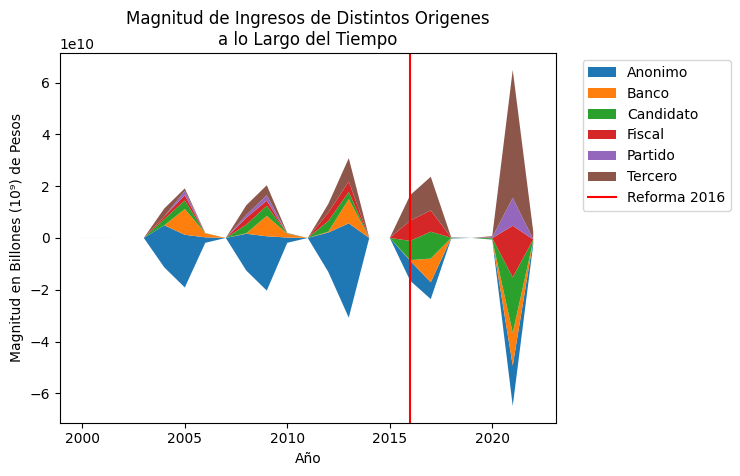

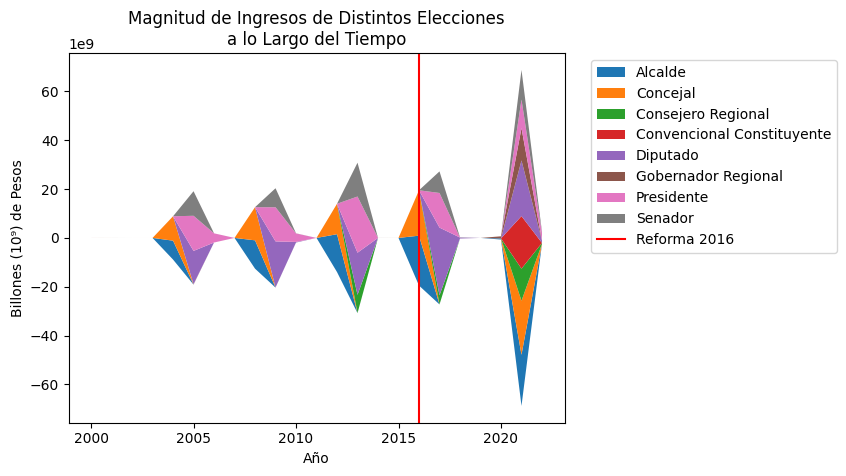

In [ ]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
#Theme River
plt.stackplot(range(2000, 2023), ys_o, labels=categories_o, baseline='sym')
plt.xlabel('Año')
plt.ylabel('Magnitud en Billones (10⁹) de Pesos')
#ax = plt.gca()
#ax.set_yticklabels([f"{abs(x):.0e}" for x in ax.get_yticks()])
#ax.set_yticklabels([str(abs(x):e) for x in ax.get_yticks()])
#ax.set_yticklabels([str(abs(x)) for x in ax.get_yticks()])
#plt.yticks([])
plt.title('Magnitud de Ingresos de Distintos Origenes\na lo Largo del Tiempo')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(9,9))
plt.axvline(x=2016, color='r', label='Reforma 2016')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#scalebar = AnchoredSizeBar(ax.transData, 0.2, label="10 Billones (10⁹) de Pesos", loc='upper left', size_vertical=10*10**9, label_top=True)
#ax.add_artist(scalebar)
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])
plt.show()

plt.stackplot(range(2000, 2023), ys_e, labels=categories_e, baseline='sym')
plt.xlabel('Año')
plt.ylabel('Billones (10⁹) de Pesos')
plt.title('Magnitud de Ingresos de Distintos Elecciones\na lo Largo del Tiempo')
plt.ticklabel_format(axis='y', style='sci', scilimits=(9,9))
plt.axvline(x=2016, color='r', label='Reforma 2016')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

# Treemap aportes recibidos por candidatos de un partido

In [ ]:
import plotly.express as px

In [ ]:
candidate_names = df[['Candidato','RUTCandidato']][df['TipoIngreso']=='Ingresos Candidatos'].groupby(['RUTCandidato','Candidato']).size().reset_index().rename(columns={0:'count'})[['RUTCandidato','Candidato']].copy()
candidate_names = candidate_names.dropna().drop_duplicates('RUTCandidato')
names = dict(zip(candidate_names.RUTCandidato, candidate_names.Candidato))

In [ ]:
categories_e = [
    'Alcalde',
    'Concejal',
    'Consejero Regional',
    'Convencional Constituyente',
    'Diputado',
    'Gobernador Regional',
    'Presidente',
    'Senador'
]

replace_dict = {
    'Alcalde Primarias': 'Alcalde',
    'Diputado Primarias': 'Diputado',
    'Gobernador Regional Primarias': 'Gobernador Regional',
    'Gobernador Regional Segunda Votacion': 'Gobernador Regional',
    'Presidente Primarias': 'Presidente',
    'Presidente Segunda Votacion': 'Presidente'
}

dfp = df[['Partido', 'RUTCandidato', 'Monto', 'Eleccion']][df['TipoIngreso']=='Ingresos Candidatos'].copy().dropna()
dfp['Eleccion'].replace(replace_dict, inplace=True)
dfp = dfp.groupby(['Partido', 'RUTCandidato', 'Eleccion']).sum('Monto').reset_index()
dfp['Partido'].replace({'Independientes': 'Independeiente'}, inplace=True)
dfp['Candidato'] = dfp.apply(lambda x: names[x['RUTCandidato']], axis=1)

In [ ]:
def treemap(dfp, np, nc):
  top_partidos = dfp[['Partido','Monto']].groupby('Partido').sum().sort_values('Monto', ascending=False).reset_index().head(np)['Partido']
  dfp = dfp[dfp['Partido'].isin(top_partidos)]

  top_candidatos = dfp[['Partido','Candidato','Monto']].sort_values('Monto', ascending=False).groupby('Partido').head(np).reset_index(drop=True)['Candidato']
  dfp = dfp[dfp['Candidato'].isin(top_candidatos)]

  return px.treemap(
      dfp,
      path=['Partido', 'Candidato', 'Eleccion'],
      color='Eleccion',
      values='Monto',
  )
fig = treemap(dfp, 20,20)
print('Cantidad de Ingresos en Distintas Elecciones de Candidatos de Diferentes Partidos:')
fig.show()

Cantidad de Ingresos en Distintas Elecciones de Candidatos de Diferentes Partidos:
